# Measuring k-mer detection against genome sequencing

Questions:
* how many reads do you need to detect a genome at what fraction?
* equiv., what is the minimum coverage needed?
* how well do FracMinHash hashes track actual number of k-mers?

Notebook run on 50kb genome with **10,000bp** reads.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('basic-detection-10000bp.csv')
df

,num_reads,coverage,n_detected,f_detected,smash_count_0,smash_count_1,smash_count_2,smash_count_3,smash_count_4
0,0,0.0,0,0.0000,0,0,0,0,0
1,1,0.2,8452,0.1691,4,6,10,8,16
2,2,0.4,13718,0.2745,8,9,13,13,25
3,3,0.6,14853,0.2972,10,9,14,13,26
4,4,0.8,22841,0.4571,20,16,19,19,39
5,5,1.0,28402,0.5684,23,23,24,29,49
6,6,1.2,32096,0.6423,26,24,30,35,53
7,7,1.4,34791,0.6962,27,28,32,40,56
8,8,1.6,34906,0.6985,27,28,32,40,56
9,9,1.8,35408,0.7086,28,28,32,41,56


## K-mer detection scales with number of reads

Notes:
* Only "correct" k-mers are counted.
* FracMinHash hashes are multiplied by scaled value (=1000)

(-5.0, 25.0)

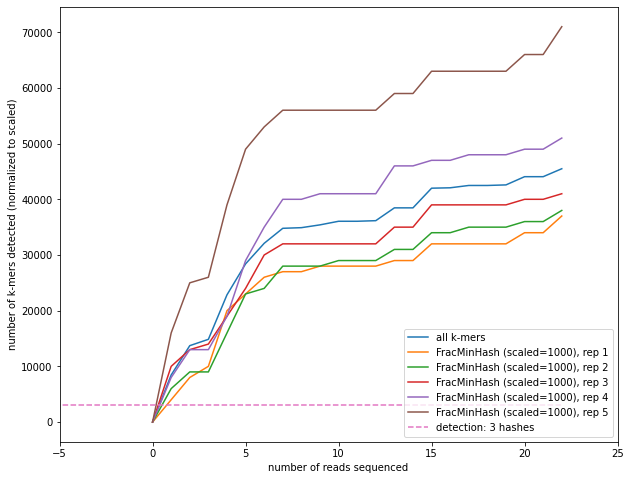

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df.num_reads, df.n_detected, label="all k-mers")
ax.plot(df.num_reads, df.smash_count_0 * 1000, label="FracMinHash (scaled=1000), rep 1")
ax.plot(df.num_reads, df.smash_count_1 * 1000, label="FracMinHash (scaled=1000), rep 2")
ax.plot(df.num_reads, df.smash_count_2 * 1000, label="FracMinHash (scaled=1000), rep 3")
ax.plot(df.num_reads, df.smash_count_3 * 1000, label="FracMinHash (scaled=1000), rep 4")
ax.plot(df.num_reads, df.smash_count_4 * 1000, label="FracMinHash (scaled=1000), rep 5")

ax.plot([-100, max(df.num_reads)], [3000, 3000], '--', label="detection: 3 hashes")

ax.set_xlabel("number of reads sequenced")
ax.set_ylabel("number of k-mers detected (normalized to scaled)")
ax.legend(loc='lower right')

#ax.set_ylim(0, 10*1000)
ax.set_xlim(-5, 25)

## Low detection thresholds are reached quickly

A threshold of 3 hashes is reached with very few reads

Notes:
* Only "correct" k-mers are counted.
* FracMinHash hashes are multiplied by scaled value (=1000)

(-5.0, 25.0)

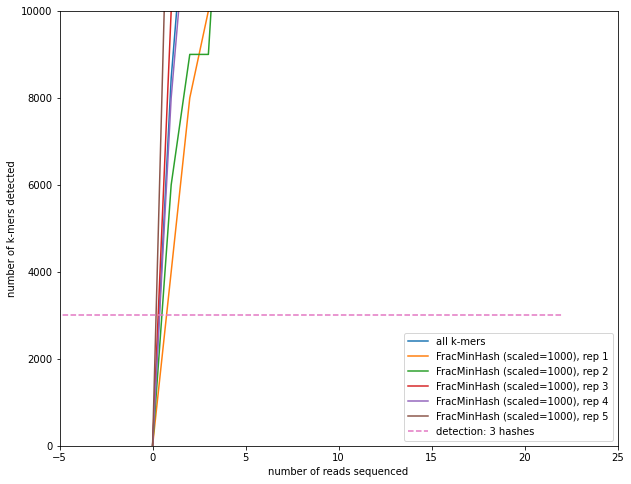

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df.num_reads, df.n_detected, label="all k-mers")
ax.plot(df.num_reads, df.smash_count_0 * 1000, label="FracMinHash (scaled=1000), rep 1")
ax.plot(df.num_reads, df.smash_count_1 * 1000, label="FracMinHash (scaled=1000), rep 2")
ax.plot(df.num_reads, df.smash_count_2 * 1000, label="FracMinHash (scaled=1000), rep 3")
ax.plot(df.num_reads, df.smash_count_3 * 1000, label="FracMinHash (scaled=1000), rep 4")
ax.plot(df.num_reads, df.smash_count_4 * 1000, label="FracMinHash (scaled=1000), rep 5")

ax.plot([-250, max(df.num_reads)], [3000, 3000], '--', label="detection: 3 hashes")

ax.set_xlabel("number of reads sequenced")
ax.set_ylabel("number of k-mers detected")
ax.legend(loc='lower right')

ax.set_ylim(0, 10*1000)
ax.set_xlim(-5, 25)

## Detection threshold are quickly exceeded at low coverage

Notes:
* "coverage" depends on genome size, unlike number of reads sequenced (previous plots)
* Only "correct" k-mers are counted.
* FracMinHash hashes are multiplied by scaled value (=1000)

(-0.1, 2.0)

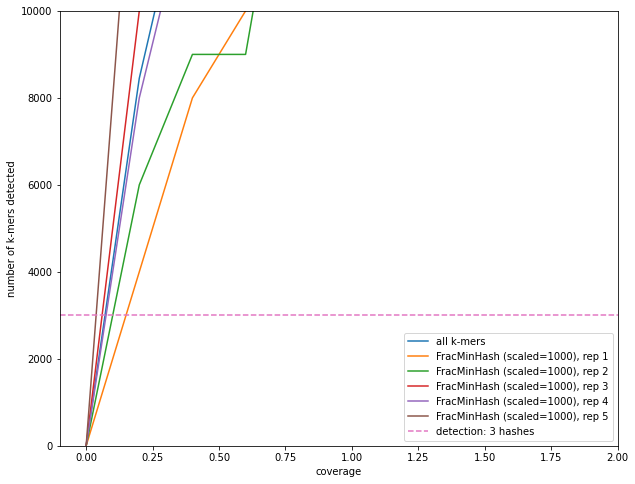

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df.coverage, df.n_detected, label="all k-mers")
ax.plot(df.coverage, df.smash_count_0 * 1000, label="FracMinHash (scaled=1000), rep 1")
ax.plot(df.coverage, df.smash_count_1 * 1000, label="FracMinHash (scaled=1000), rep 2")
ax.plot(df.coverage, df.smash_count_2 * 1000, label="FracMinHash (scaled=1000), rep 3")
ax.plot(df.coverage, df.smash_count_3 * 1000, label="FracMinHash (scaled=1000), rep 4")
ax.plot(df.coverage, df.smash_count_4 * 1000, label="FracMinHash (scaled=1000), rep 5")

ax.plot([-0.1, max(df.coverage)], [3000, 3000], '--', label="detection: 3 hashes")

ax.set_xlabel("coverage")
ax.set_ylabel("number of k-mers detected")
ax.legend(loc='lower right')

ax.set_ylim(0, 10*1000)
ax.set_xlim(-0.1, 2.0)